<a href="https://colab.research.google.com/github/MeetMotwani/Meet-Motwani-Spider-task-1-basic/blob/main/Meet_Motwani_Spider_Basic_Task_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uploading the dataset

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Vehicle Database.zip to Vehicle Database.zip


unziping dataset and adding to specific folder

In [4]:
import zipfile
import os

zip_path = '/content/Vehicle Database.zip'
extract_path = '/content/vehicles'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


Importing all the libraries

In [45]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

import matplotlib.pyplot as plt
import numpy as np
import os
from torchvision import models
from PIL import Image

setting up data and transformation

In [49]:
!unzip -q "/content/Vehicle Database.zip" -d "/content/Vehicles"

standard transformation for resnet input

In [51]:
data_path = "/content/Vehicles"

# standard transformation for ResNet input
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

Loading dataset

In [52]:
dataset = datasets.ImageFolder(root=data_path, transform=transform)

splitting into 80% train and 20% test

In [53]:
train_len = int(0.8 * len(dataset))
test_len = len(dataset) - train_len
train_ds, test_ds = torch.utils.data.random_split(dataset, [train_len, test_len])


Dataloaders

In [54]:
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=32, shuffle=False)

checking class labels

In [55]:
classes = dataset.classes
print("Classes found:", classes)

Classes found: ['Vehicles']


Loading the model

In [56]:
model = models.resnet18(pretrained=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Changing layers to match all 7 classes

In [57]:
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 7)
model = model.to(device)

Loss and Optimizer

In [58]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


Training the model

In [59]:
epochs = 5
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [1/5], Loss: 0.0489
Epoch [2/5], Loss: 0.0000
Epoch [3/5], Loss: 0.0000
Epoch [4/5], Loss: 0.0000
Epoch [5/5], Loss: 0.0000


In [75]:
def show_prediction(class_name):
    class_folder = os.path.join(data_path, class_name)
    # Iterate through files in the directory and find an image file
    img_path = None
    for filename in os.listdir(class_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            img_path = os.path.join(class_folder, filename)
            break  # Take the first image file found

    if img_path is None:
        print(f"No image found in directory: {class_folder}")
        return

    img = Image.open(img_path).convert('RGB')
    img_tensor = transform(img).unsqueeze(0).to(device)

    with torch.no_grad():
        out = model(img_tensor)
        pred_idx = torch.argmax(out, 1).item()

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {classes[pred_idx]}")
    plt.show()

In [70]:
classes = sorted(os.listdir("Vehicles"))


In [71]:
for cls in classes:
    show_prediction(cls)


IsADirectoryError: [Errno 21] Is a directory: '/content/Vehicles/Vehicles/Ships'

['Vehicles']


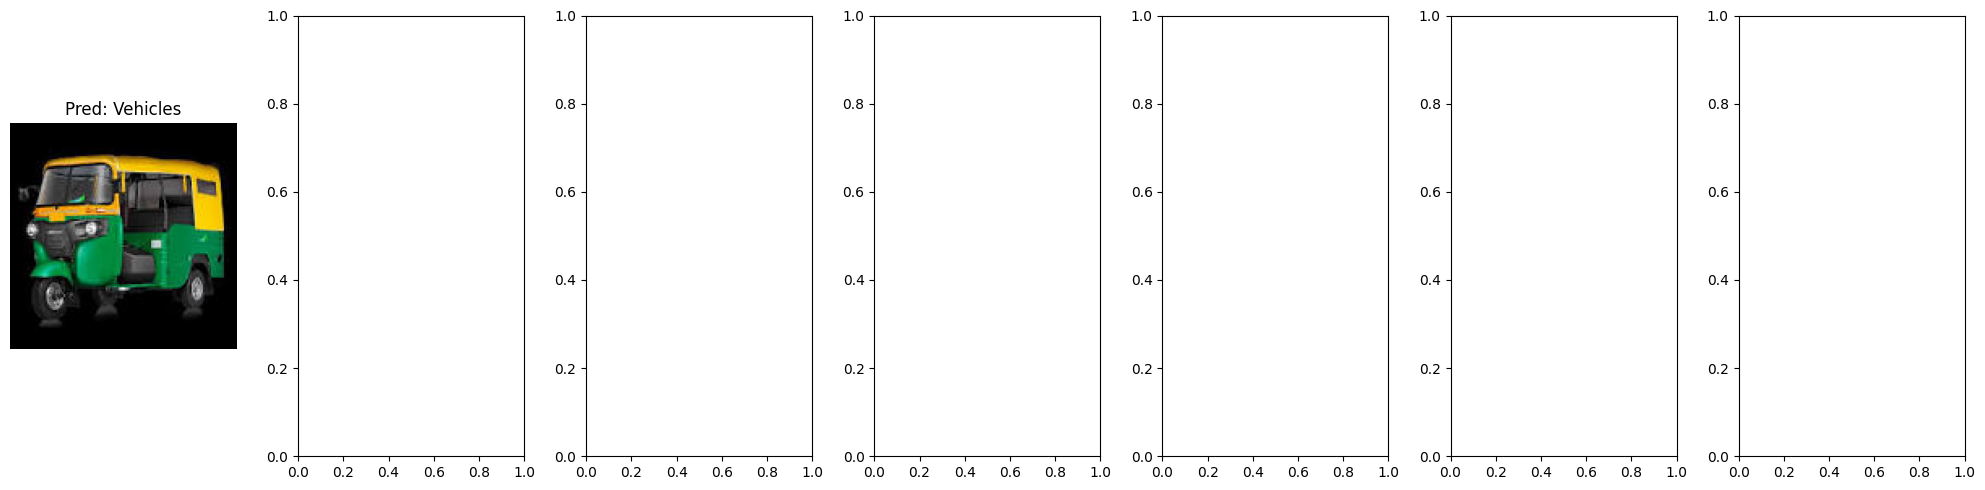

In [76]:
shown_classes = set()
fig, axs = plt.subplots(1, 7, figsize=(20, 5))

for img_path, label in dataset.samples:
    class_name = dataset.classes[label]

    if class_name in shown_classes:
        continue

    image = Image.open(img_path).convert('RGB')
    input_tensor = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(input_tensor)
        _, predicted = torch.max(output, 1)

    axs[len(shown_classes)].imshow(image)
    axs[len(shown_classes)].set_title(f"Pred: {dataset.classes[predicted.item()]}")
    axs[len(shown_classes)].axis('off')

    shown_classes.add(class_name)

    if len(shown_classes) == 7:
        break

plt.tight_layout()
plt.show()


In [74]:
for cls in classes:
    show_prediction(cls)

No image found in directory: /content/Vehicles/Vehicles
